## Waste Management Using CNN Model

In [10]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [7]:
!kaggle datasets list -s "phone"

ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jacksondivakarr/phone-classification-dataset                  Phone Classification Dataset                     205KB  2023-12-12 15:21:07           6602         84  1.0              
berkayeserr/phone-prices                                      Phone Prices                                      27KB  2023-09-06 15:09:29           3903         47  0.88235295       
rkiattisak/mobile-phone-price                                 Mobile Phone Price                                 5KB  2023-03-09 04:15:24           8620         73  1.0              
atefehmirnaseri/cell-phone-price                              Cell Phone Price       

In [13]:
import os
import json

# Define Kaggle directory
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Correct file path (use raw string `r""` or double backslashes `\\`)
kaggle_json_path = r"C:\Users\Hitakshu Goswami\.kaggle\Kaggle.json"  # Update this path if needed

# Read the Kaggle API key file
with open(kaggle_json_path, "r") as f:
    kaggle_creds = json.load(f)

# Save kaggle.json to ~/.kaggle/
with open(os.path.join(kaggle_dir, "kaggle.json"), "w") as f:
    json.dump(kaggle_creds, f)

# Set proper permissions
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

print("✅ Kaggle API key configured successfully!")


✅ Kaggle API key configured successfully!


In [14]:
%pip install tensorflow tensorflow_addons keras-tuner -q
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from kerastuner.tuners import RandomSearch


ERROR: Could not find a version that satisfies the requirement tensorflow_addons (from versions: none)
ERROR: No matching distribution found for tensorflow_addons


Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'tensorflow_addons'

In [12]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [19]:
%pip install tensorflow-addons


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-addons (from versions: none)
ERROR: No matching distribution found for tensorflow-addons


In [20]:
%pip install tensorflow-addons==0.21.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-addons==0.21.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-addons==0.21.0


In [22]:
!python --version
!pip show tensorflow



Python 3.12.4
Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Hitakshu Goswami\AppData\Roaming\Python\Python312\site-packages
Requires: tensorflow-intel
Required-by: 


In [23]:
%pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
os._exit(0)


: 

In [2]:
%pip install tensorflow-addons --no-cache-dir


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-addons (from versions: none)
ERROR: No matching distribution found for tensorflow-addons


In [3]:
pip install tensorflow-addons[tensorflow]


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-addons[tensorflow] (from versions: none)
ERROR: No matching distribution found for tensorflow-addons[tensorflow]


In [1]:
!python --version
!pip show tensorflow


Python 3.12.4
Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Hitakshu Goswami\AppData\Roaming\Python\Python312\site-packages
Requires: tensorflow-intel
Required-by: 


In [2]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow_addons as tfa


ModuleNotFoundError: No module named 'tensorflow_addons'

In [16]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [16]:
%pip install tensorflow-addons==0.21.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-addons==0.21.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-addons==0.21.0


In [17]:
train_path="DATASET/TRAIN"
test_path="DATASET/TEST"

In [18]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [19]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:25<00:00, 390.23it/s]


In [20]:
data.shape

(22564, 2)

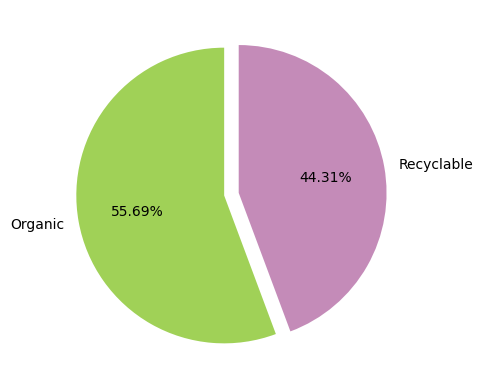

In [21]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()

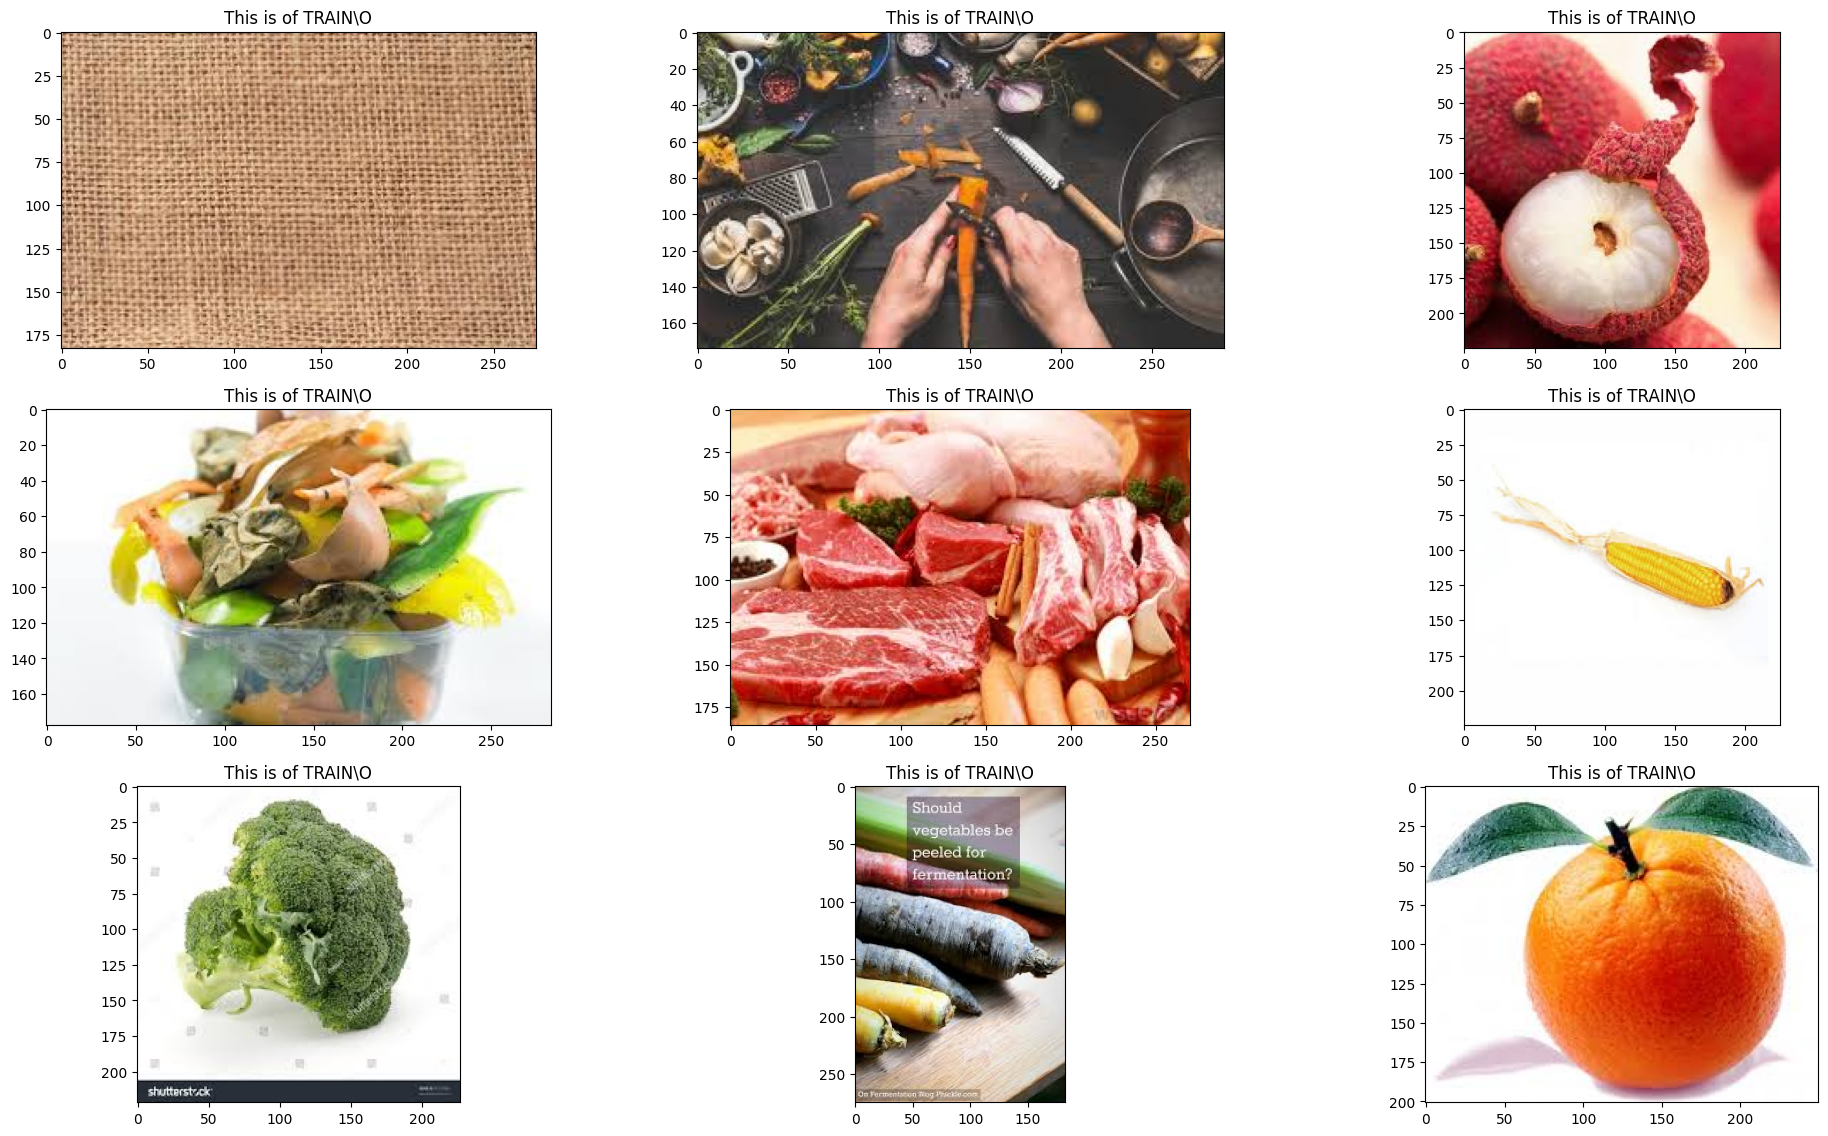

In [22]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [23]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64




In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")
    
    

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [28]:
hist = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator)


Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step - accuracy: 0.7734 - loss: 0.5331 - val_accuracy: 0.8082 - val_loss: 0.4230
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 479s 1s/step - accuracy: 0.8430 - loss: 0.3876 - val_accuracy: 0.8428 - val_loss: 0.3742
Epoch 3/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 507s 1s/step - accuracy: 0.8632 - loss: 0.3398 - val_accuracy: 0.8866 - val_loss: 0.3078
Epoch 4/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 252s 713ms/step - accuracy: 0.8741 - loss: 0.3206 - val_accuracy: 0.9053 - val_loss: 0.2537
Epoch 5/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 240s 678ms/step - accuracy: 0.8913 - loss: 0.2753 - val_accuracy: 0.9057 - val_loss: 0.2611
Epoch 6/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 224s 633ms/step - accuracy: 0.9073 - loss: 0.2345 - val_accuracy: 0.8902 - val_loss: 0.3185
Epoch 7/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 279s 790ms/step - accuracy: 0.9348 - loss: 0.1776 - val_accuracy: 0.8822 - val_loss: 0.3848
Epoch 8/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 249s 704ms/step - accuracy: 0.9499 - loss: 0.

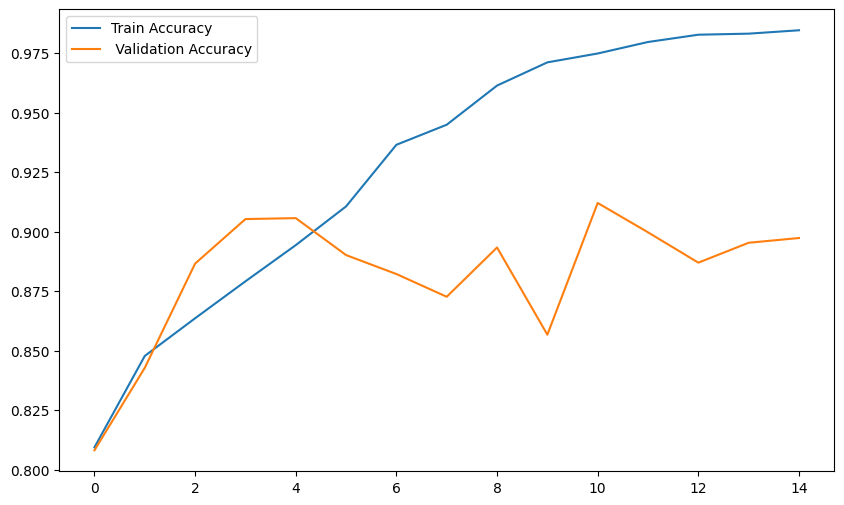

In [29]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()

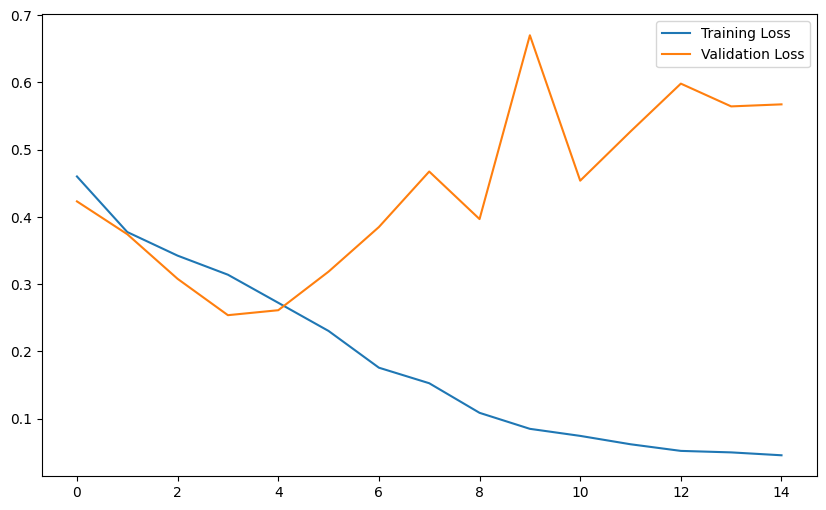

In [30]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [31]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
The image shown is Organic Waste


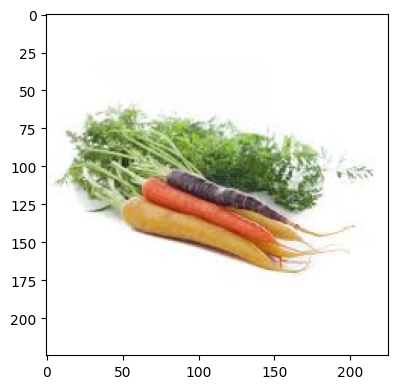

In [34]:
test_img = cv2.imread('DATASET\TEST\O\O_12627.jpg')
predict_fun(test_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The image shown is Recyclable Waste


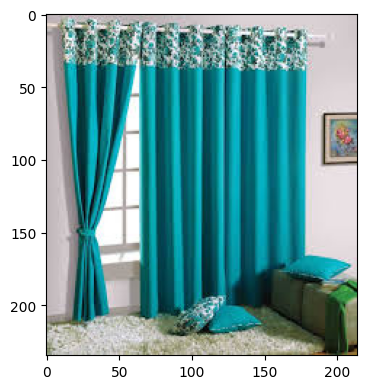

In [35]:
test_img = cv2.imread('DATASET\TEST\R\R_10012.jpg')
predict_fun(test_img)

In [14]:
# Define image dimensions and number of classes
img_height = 128  # Replace with your desired height
img_width = 128   # Replace with your desired width
num_classes = 2   # Replace with the number of waste categories (e.g., Organic, Recyclable)

# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(img_height, img_width, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,  # Path to the training dataset
    target_size=(img_height, img_width),  # Resize images to the specified dimensions
    batch_size=32,  # Number of samples per batch
    class_mode='categorical'  # Multi-class classification (uses one-hot encoding)
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,  # Path to the testing/validation dataset
    target_size=(img_height, img_width),  # Resize images to the specified dimensions
    batch_size=32,  # Number of samples per batch
    class_mode='categorical'  # Multi-class classification
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [16]:
history = model.fit(
    train_generator,  # Training data
    validation_data=test_generator,  # Validation data
    epochs=20  # Number of training epochs
)


Epoch 1/20
140/706 ━━━━━━━━━━━━━━━━━━━━ 3:13 342ms/step - accuracy: 0.7183 - loss: 5.0135

KeyboardInterrupt: 

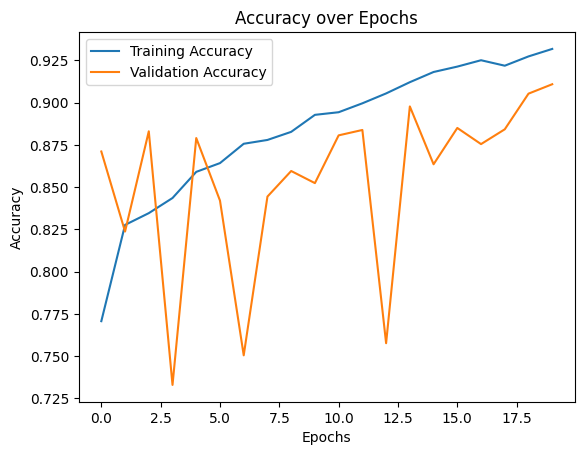

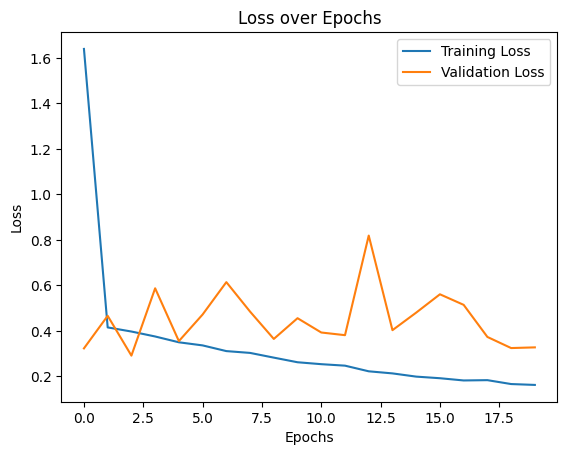

In [13]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
